In [1]:
"""
Name: con_munich_test.ipynb
Authors: Stephan Meighen-Berger
Checking parameters for munich
"""
%load_ext autoreload
%autoreload 2

In [2]:
 # General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Munich data
pop_munich = 1.456 * 1e6
time_steps = [7., 9., 10., 11., 12., 13.,
              14., 15., 16., 17., 18., 19.,
              20., 21., 23., 24., 25., 26., 27.]
data_points = [44., 60., 68., 88., 110.,
               149., 201., 242., 260., 359., 509.,
               676., 878., 1042., 1316., 1381.,
               1576., 1687., 1845.
              ]

In [6]:
# Module imports
from contagion import Contagion, config
# Simulation time
config["simulation length"] = 30
# Infected
config["infected"] = int(data_points[0])
# Population
config["average social circle"] = 40
config["population size"] = int(pop_munich)
# Distributions
config['infection duration pdf'] = 'gamma'
config['infectious duration pdf'] = 'gamma'
config['incubation duration pdf'] = 'gamma'
config['hospitalization duration pdf'] = 'gamma'
config['time until hospitalization pdf'] = 'gamma'
config['time incubation death pdf'] = 'gamma'
config['recovery time pdf'] = 'gamma'

In [7]:
# Creating a contagion object
contagion = Contagion()

In [8]:
 # Storing the solutions
config["random state"] = np.random.RandomState(1337)
contagion.sim()

In [9]:
stats = pd.DataFrame(contagion.statistics)

In [10]:
# Plotting standards
std_size = 10.
fontsize = 15.
lw=3.
h_length=1.

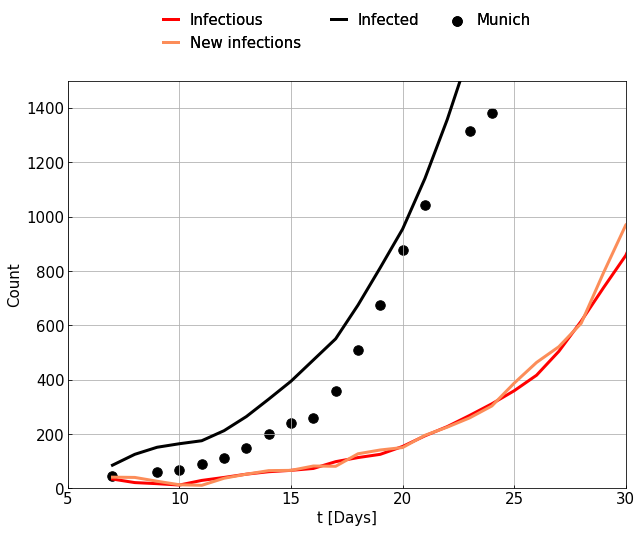

In [19]:
 # Infections per time step
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
ax.plot(contagion.t + 7., stats['infectious'],
        lw=lw, label='Infectious', color='r')
ax.plot(contagion.t + 7., stats['new infections'],
        lw=lw, label='New infections', color=colors[1])
ax.plot(contagion.t + 7., stats['infected'],
        lw=lw, label='Infected', color="k")
ax.scatter(time_steps, data_points, s=lw*30., color='k', label='Munich')
ax.set_xlim(5, 30)
ax.set_ylim(0., 1500)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r't [Days]', fontsize=fontsize)
ax.set_ylabel(r'Count', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.2),
                 ncol=3, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.grid(True)
plt.show()

In [20]:
figure.savefig(PICS + "Contagion_Munich.png",
               bbox_inches='tight')